# Inferring RNA velocities on each branch for branching genes in the mouse hippocampus development

This tutorial shows how cellDancer analyzes RNA velocity. The process includes (1) estimating RNA velocity, (2) deriving cell fates on embedding space, (3) estimating pseudotime, and (4) displaying predicted kinetics rates (transcription, splicing, and degradation rates), spliced mRNA abundance, and unspliced mRNA abundance on embedding space.

Below is the case study for the mouse hippocampal dentate gyrus neurogenesis. We follow the preprocessing methods of [La Manno et al.](https://www.nature.com/articles/s41587-020-0591-3) to filter genes and cells. 18,140 cells with 2,159 genes were selected.

## Import packages

To run the notebook locally, [Installation](installation.html) could be referred to install the environment and dependencies.

In [1]:
# import packages
import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt
import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

## Load data

The input data for cellDancer contains the preprocessed abundances of unspliced RNA and spliced RNA.
The data of mouse hippocampal dentate gyrus neurogenesis can be ownloaded from [DentateGyrus_cell_type_u_s.csv.zip](https://drive.google.com/file/d/1wm_frx0Zq6OVN4Eu8xXAX5ggHwXfg3xe/view?usp=sharing). To load your own data, the dataframe should contain columns 'gene_name', 'unsplice', 'splice' ,'cellID' ,'clusters' ,'embedding1', and 'embedding2.' For a detailed description about the preprocessing and the data structure, refer to [Data Preparation](data_preprocessing.html).

In [2]:
cell_type_u_s_path="your_path/DentateGyrus_cell_type_u_s.csv"
cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s

,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,Rgs20,0.069478,0.021971,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429
1,Rgs20,0.085834,0.016256,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895
2,Rgs20,0.068644,0.047774,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419
3,Rgs20,0.045387,0.018101,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485
4,Rgs20,0.040457,0.012846,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900
...,...,...,...,...,...,...,...
39164255,Gpm6b,0.876650,1.276089,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668
39164256,Gpm6b,2.024897,5.152006,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788
39164257,Gpm6b,1.848051,1.491445,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364
39164258,Gpm6b,0.696361,1.189091,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549


## Estimate RNA velocity for sample genes

We use ```cd.velocity()``` to estimate the velocity. Here, 30 genes in ```gene_list``` are estimated as an example. The predicted unspliced and spliced reads, alpha, beta, and gamma are added to the dataframe.

In [3]:
gene_list=['Psd3', 'Dcx', 'Syt11', 'Ntrk2', 'Gnao1', 'Gria1', 'Dctn3', 'Map1b', 'Camk2a', 'Gpm6b', 'Sez6l', 'Evl', 'Astn1', 'Ank2', 'Klf7', 'Tbc1d16', 'Atp1a3', 'Stxbp6', 'Scn2a1', 'Lhx9', 'Slc4a4', 'Ppfia2', 'Kcnip1', 'Ptpro', 'Diaph3', 'Slc1a3', 'Cadm1', 'Mef2c', 'Sptbn1', 'Ncald']

loss_df, cellDancer_df=cd.velocity(cell_type_u_s,
                                   gene_list=gene_list,
                                   permutation_ratio=0.1,
                                   norm_u_s=False,
                                   norm_cell_distribution=False,
                                   n_jobs=8)
cellDancer_df

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cellDancer_velocity_2022-06-27 16-37-44 as the output path.
Arranging genes for parallel job.
30  genes were arranged to  4  portions.



Velocity Estimation: 100%|██████████| 4/4 [01:52<00:00, 26.11s/it]                                                                                                                                                                                                 
                                                                                                                                                                                                                                                                   

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Klf7,0.408467,1.294797,0.444935,1.475828,0.454905,0.935128,0.015373,0.077489,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429
1,1,Klf7,0.379136,1.256870,0.411796,1.424216,0.419835,0.935061,0.015772,0.077489,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895
2,2,Klf7,0.893599,3.395004,0.969404,3.832591,1.033540,0.986942,0.001990,0.077489,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419
3,3,Klf7,0.640505,2.739187,0.669036,3.047821,0.684626,0.979797,0.003759,0.077489,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485
4,4,Klf7,0.662303,2.433943,0.712970,2.749427,0.745024,0.971894,0.005226,0.077489,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544195,18135,Kcnip1,0.018745,0.005679,0.243844,0.008779,0.463909,0.731405,1.322285,0.079982,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668
544196,18136,Kcnip1,0.148039,0.093618,0.380534,0.085685,0.572677,0.727422,1.319759,0.079982,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788
544197,18137,Kcnip1,0.080708,0.032079,0.312729,0.040230,0.522807,0.728119,1.323665,0.079982,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364
544198,18138,Kcnip1,0.078976,0.033418,0.310343,0.040067,0.520257,0.728360,1.323348,0.079982,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549


## Visualize the phase portraits

We visualize the phase portrait of each gene with ```cdplt.scatter_gene()```.

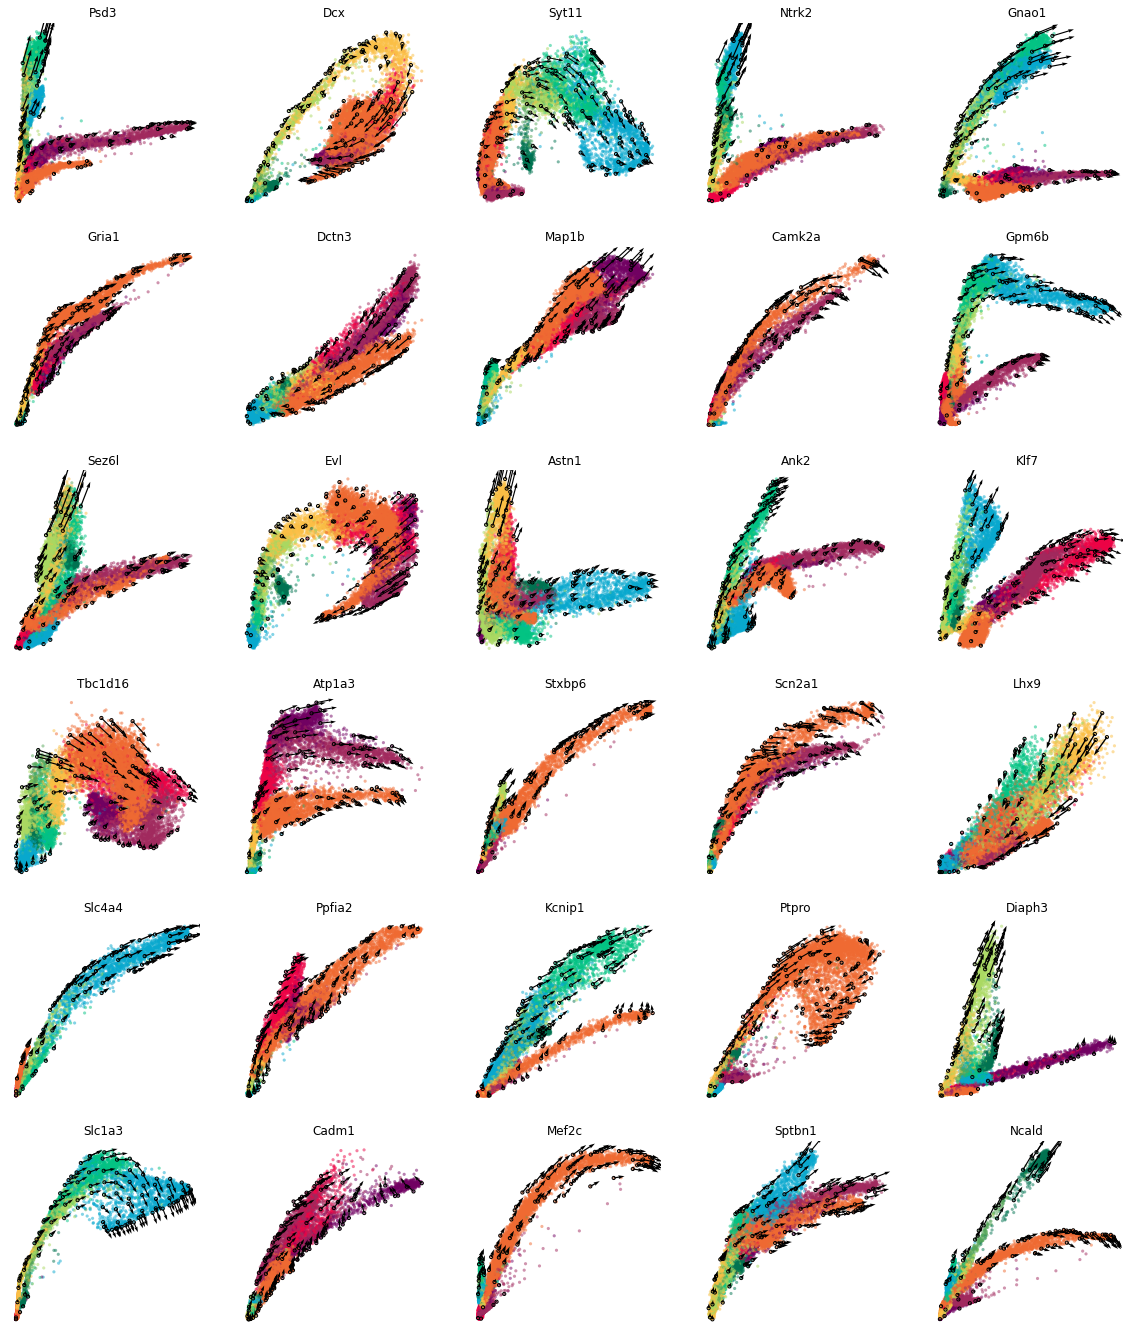

In [4]:
ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 10,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Project the RNA velocity onto the embedding space

To project the prediction of RNA velocity to velocity onto the embedding space and to estimate pseudotime by using all genes, predicted result can be downloaded from [DentateGyrus_cellDancer_estimation.csv.zip](https://drive.google.com/file/d/1CziKfu_4Lvecfdv9OJ3qktT5-Do0naiE/view?usp=sharing).

In [5]:
# load the prediction result of all genes
cellDancer_df_file = 'your_path/DentateGyrus_cellDancer_estimation.csv'
cellDancer_df=pd.read_csv(cellDancer_df_file)

We calculate the projection of RNA velocity on the embedding with ```cd.compute_cell_velocity()```. The projected direction on embedding space, i.e. columns 'velocity1' and 'velocity2' are added to the original dataframe. We use ```cdplt.scatter_cell()``` to display the predicted direction on embedding space.

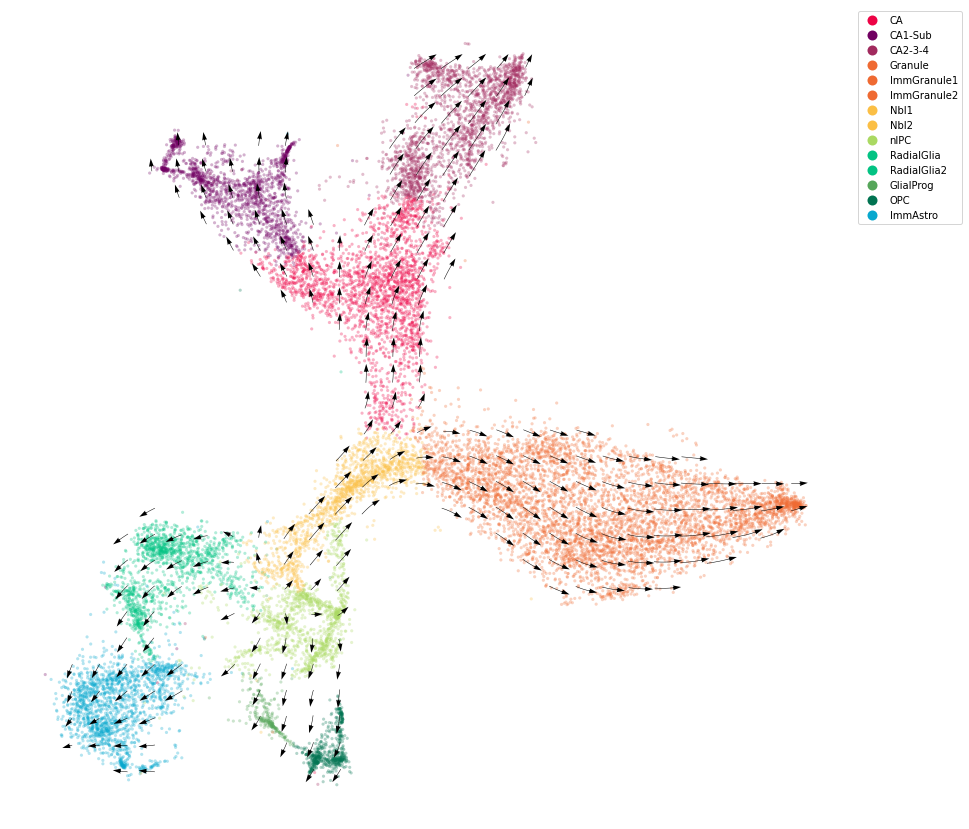

In [6]:
# compute cell velocity
cellDancer_df=cd.compute_cell_velocity(cellDancer_df=cellDancer_df)

# plot cell velocity
fig, ax = plt.subplots(figsize=(15,15))
im = cdplt.scatter_cell(ax,cellDancer_df, 
                        colors=colormap.colormap_neuro, 
                        alpha=0.3, 
                        s=10,
                        velocity=True, 
                        legend='on',
                        min_mass=2,
                        arrow_grid=(30,30))
ax.axis('off')
plt.show()

## Estimate pseudotime

Based on the projection of RNA velocity on embedding space, we estimate the pseudotime with ```cd.pseudo_time()```.

In [7]:
%%capture

# set parameters
dt = 0.001
t_total = {dt: 10000}
n_repeats = 10

# estimate pseudotime
cellDancer_df = cd.pseudo_time(cellDancer_df=cellDancer_df, 
                                          grid=(30, 30), 
                                          dt=dt, 
                                          t_total=t_total[dt],
                                          n_repeats=n_repeats,
                                          speed_up=(60,60),
                                          n_paths = 5,
                                          psrng_seeds_diffusion=[i for i in range(n_repeats)],
                                          n_jobs=8)

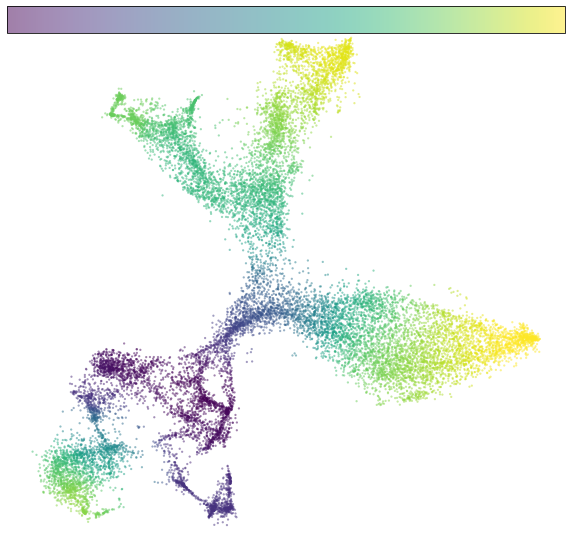

In [8]:
# plot pseudotime
fig, ax = plt.subplots(figsize=(10,10))
im=cdplt.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, velocity=False)
ax.axis('off')
plt.show()

## Display the abundance of spliced RNA along pseudotime

We visualize the spliced RNA abundance of some sample genes along pseudotime with ```cdplt.scatter_gene()```.

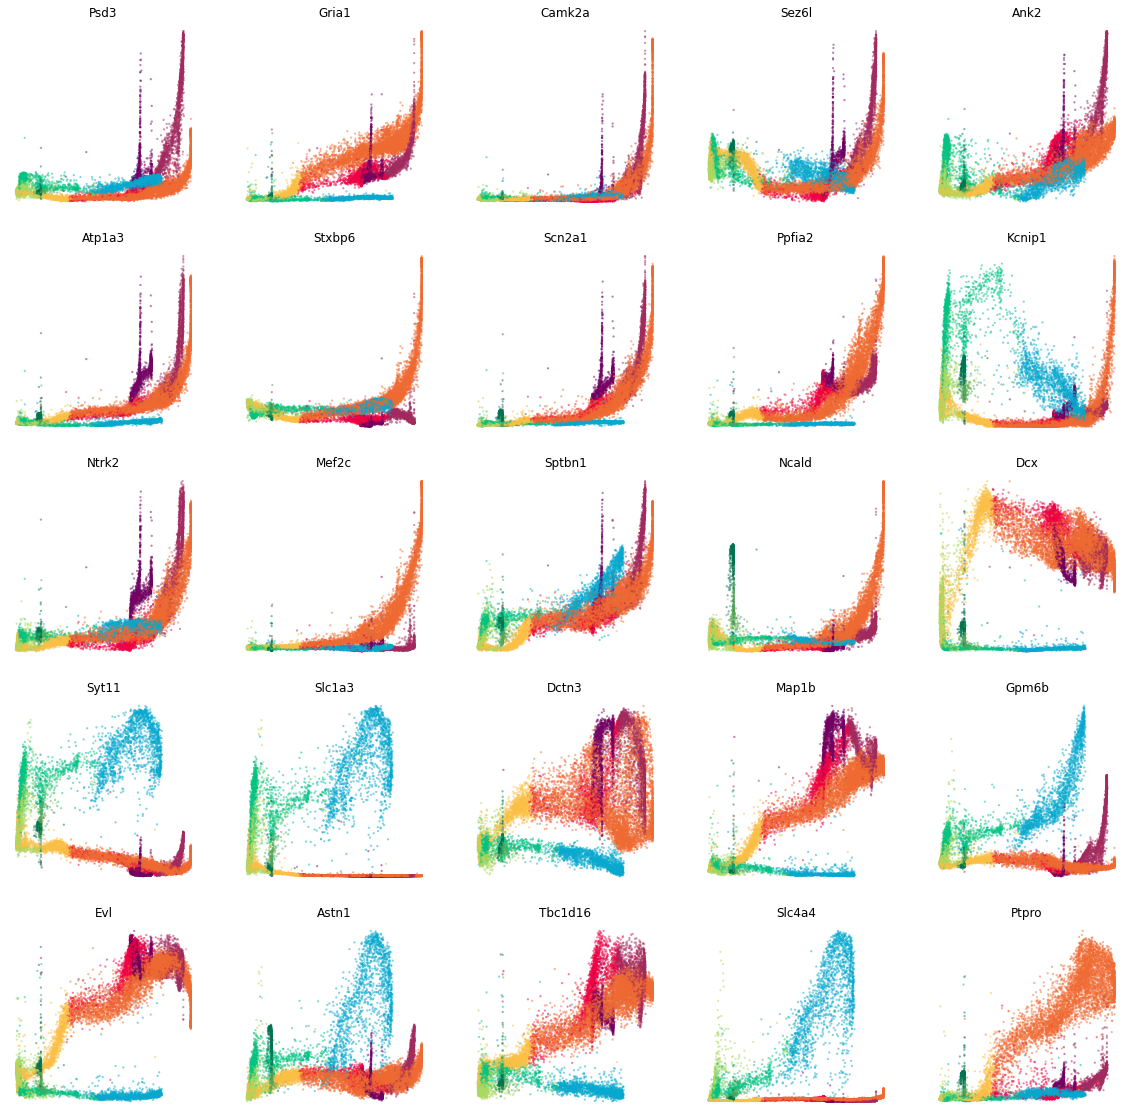

In [9]:
gene_list=['Psd3', 'Gria1', 'Camk2a', 'Sez6l', 'Ank2', 'Atp1a3', 'Stxbp6', 'Scn2a1', 'Ppfia2', 'Kcnip1', 'Ntrk2', 'Mef2c', 'Sptbn1', 'Ncald','Dcx', 'Syt11','Slc1a3', 'Dctn3', 'Map1b', 'Gpm6b', 'Evl', 'Astn1', 'Tbc1d16','Slc4a4', 'Ptpro']

ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

## Visualize the reaction rates, the abundance of unspliced RNA, and the abundance of spliced RNA on embedding space

cellDancer provides other functions for visualization. we show the predicted kinetics rates (transcription, splicing, and degradation rates), spliced mRNA abundance, and unspliced mRNA abundance on embedding space with ```cdplt.scatter_cell()```.

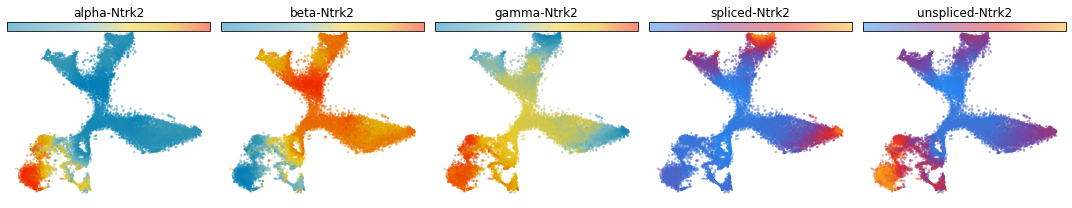

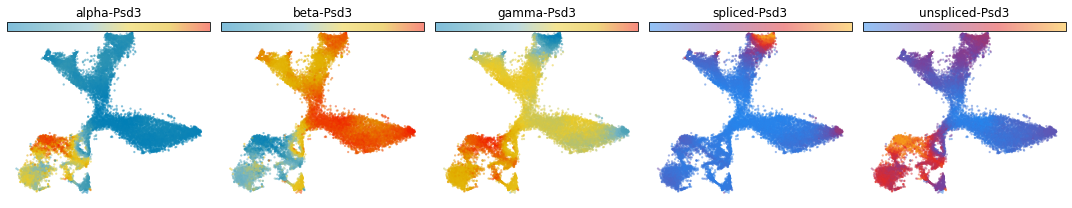

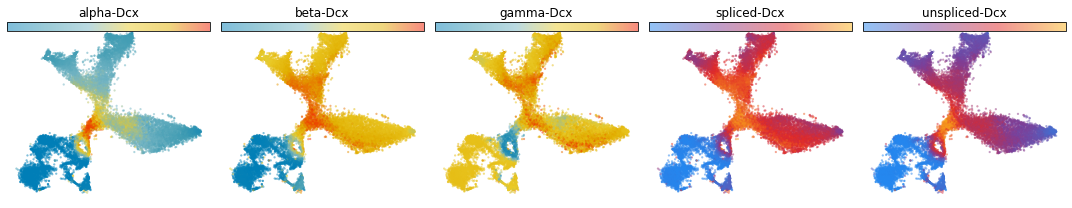

In [10]:
gene_samples=['Ntrk2','Psd3','Dcx']

for gene in gene_samples:
    fig, ax = plt.subplots(ncols=5, figsize=(15,3))
    cdplt.scatter_cell(ax[0],cellDancer_df, colors='alpha', 
                 gene=gene, velocity=False)
    cdplt.scatter_cell(ax[1],cellDancer_df, colors='beta', 
                 gene=gene, velocity=False)
    cdplt.scatter_cell(ax[2],cellDancer_df, colors='gamma', 
                 gene=gene, velocity=False)
    cdplt.scatter_cell(ax[3],cellDancer_df, colors='splice', 
                 gene=gene, velocity=False)
    cdplt.scatter_cell(ax[4],cellDancer_df, colors='unsplice', 
                 gene=gene, velocity=False)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    ax[0].set_title('alpha-'+gene)
    ax[1].set_title('beta-'+gene)
    ax[2].set_title('gamma-'+gene)
    ax[3].set_title('spliced-'+gene)
    ax[4].set_title('unspliced-'+gene)
    plt.tight_layout()
    plt.show()